**Problem constant growth**:

Note that though the daisy growth rate per unit
time depends on the amount of available fertile land, it is not
otherwise coupled to the environment (i.e. $\beta_i$ is note a function
of temperature. Making the growth a function of bare ground, however,
keeps the daisy population bounded and the daisy population will
eventually reach some steady state.  The next python cell has a script
that runs a fixed timestep Runge Kutte routine that calculates area
coverage of white and black daisies for fixed growth rates $\beta_w$ and $\beta_b$.
Try changing these growth rates (specified in the derivs5 routine) and
the initial white and black concentrations (specified in the fixed_growth.yaml file
discussed next).

1.  For a given set of growth rates try various (non-zero) initial daisy
    populations.
    
2.  For a given set of initial conditions try various growth rates. In
    particular, try rates that are both greater than and less than the
    death rate.

3.  Can you determine when non-zero steady states are achieved? Explain.
> <font color  = 'green'>
      The initial concentrations do not determine when the steady states are reached, but the growth rates do determine that. 
  </font>


******************************
context imported. Front of path:
C:\Users\abhin\repos\numeric_students
back of path: C:\Users\abhin\.ipython
******************************

through C:\Users\abhin\repos\numeric_students\numeric_notebooks\lab5\context.py
size of timeSteps fixed =  500


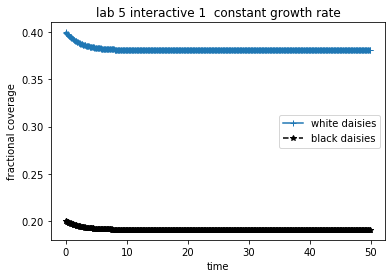

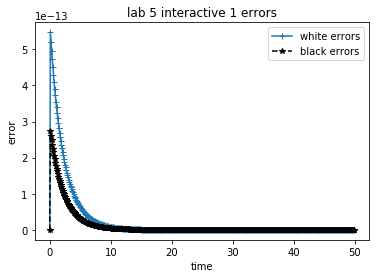

In [1]:
#
# 4.1  integrate constant growth rates with fixed timesteps
#
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt


class Integ51(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           
           Constant growty rates for white
           and black daisies beta_w and beta_b
           
           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.7  # growth rate for black daisies
        beta_w = 0.7  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f


theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

plt.close('all')
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1  constant growth rate')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, errorList)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1 errors')
theAx.set_xlabel('time')
theAx.set_ylabel('error')
out = theAx.legend(theLines, ('white errors', 'black errors'), loc='best')

**Problem Coupling**  
Consider daisies with the same albedo as the
planet, i.e. ’grey’ or neutral daisies, as specified in derivs5 routine
below.

1.  For the current value of L (0.2) in the file coupling.yaml,
    the final daisy steady state is zero.
    Why is it zero?
    
> <font color  = 'green'>
      For $L = 0.2$, the code can be run by setting a breakpoint right after the 'temp_y' line. Doing so gives the local temperature $T_i = 203.67 K$. This temperature is below the desired temperature range for the daisies (between 5 C and 40 C). So, the growth rate is 0, but the death rate is still there. So, the area covered by daisies will go down until it reaches 0. 
  </font>

2.  Find a value of L which leads to a non-zero steady state.

> <font color  = 'green'>
       An initial run is done by iterating L values coarsely (i.e. by 0.1), this gave the range where the steady state changes to non-zero to be between 0.5 and 0.6. Using finer iteration (0.01), the value which leads to a non-zero steady state was any $L > 0.57$
  </font>


3.  What happens to the emission temperature as L is varied?  Make a plot of
    $L$ vs. $T_E$ for 10-15 values of $L$.  To do this, I  overrode
    the value of L from the init file by passing a new value into
    the IntegCoupling constructor (see [Appendix A](#sec_override)).
    This allowed me to put

    ```
    theSolver = IntegCoupling("coupling.yaml",newL)
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    ```

    inside a loop that varied the L value and saved the steady state concentration
    for plotting

> <font color  = 'green'>
       The emission temperature increases as L is increased. This is sensible as the daisies get more sunlight, so more absorption happens which translates to more emission. 
  </font>

After reading the the next section on the local
temperature,

4.  Do you see any difference between the daisy temperature and emission
    temperature? Plot both and explain.  (Hint: I modified derivs5 to save
    these variables to self so I could compare their values at the end
    of the simulation.  You could also override timeloop5fixed to do the same
    thing at each timestep.)
> <font color  = 'green'>
       Yes, the daisy temperature is always smaller than the emission temperature, and the difference increases as the system is moving towards steady state. 
  </font>


5.  How (i.e. thorugh what mechanism) does the makeup of the  global daisy population
    affect the local temperature?
> <font color  = 'green'>
       The proportion of the black/white daisy population affects the overall albedo of the surface, which changes the proportion of incoming radiation that is absorbed and emitted by the surface. The amount of absorbed and emitted radiation ends up contributing to the local temperature in this model. 
  </font>
    

Hand in -- notebook cells with the code, plots and your answers.

In [2]:
# For Problem Coupling: a new function (member) reset_L was added to the provided code, and an extra line was added to the
# __init__ constructor. See comments below:
class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """
    def set_yinit(self):
        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName):
        # the yaml file has been read after running the super() line:
        super().__init__(coeffFileName)
        # We want to reset the value of L to our defined value. So, we call the 
        # reset_L function to change the value of L:
        self.reset_L(newL)
        self.set_yinit()
        # initialize the attribute: daisy temperature (T_d) and emission 
        # temperature (T_e)
        self.T_d = []
        self.T_e = []

    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25
        if (temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0
        ## Q.4: add values of T_d and T_e in the T_d and T_e arrays:
        self.T_d.append(temp_y)
        self.T_e.append( ( Te_4 )**0.25 )
        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)
        return f
    
    # this dude changes the value of L:    
    def reset_L(self, newL):
        self.config["uservars"]["L"] = newL # change solar incidence fraction
        
    # Additional function for Q3:
    def T_em(self, y):
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y
        albedo_p = x * user.albedo_ground + y * user.albedo_grey
        Te_4    = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        T_e     = (Te_4)**0.25
        return T_e

size of timeSteps fixed =  500
L =  0.5 | steady state value =  1.576092165461489e-07
size of timeSteps fixed =  500
L =  0.51 | steady state value =  1.576092165461489e-07
size of timeSteps fixed =  500
L =  0.52 | steady state value =  1.576092165461489e-07
size of timeSteps fixed =  500
L =  0.53 | steady state value =  1.576092165461489e-07
size of timeSteps fixed =  500
L =  0.54 | steady state value =  1.576092165461489e-07
size of timeSteps fixed =  500
L =  0.55 | steady state value =  1.576092165461489e-07
size of timeSteps fixed =  500
L =  0.56 | steady state value =  8.597050431803213e-06
size of timeSteps fixed =  500
L =  0.5700000000000001 | steady state value =  0.001092622730123936
size of timeSteps fixed =  500
L =  0.5800000000000001 | steady state value =  0.019775881907450946
size of timeSteps fixed =  500
L =  0.5900000000000001 | steady state value =  0.056106975287955246
size of timeSteps fixed =  500
L =  0.6000000000000001 | steady state value =  0.09239914654

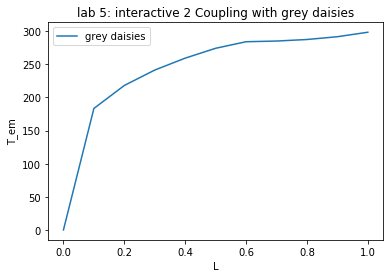

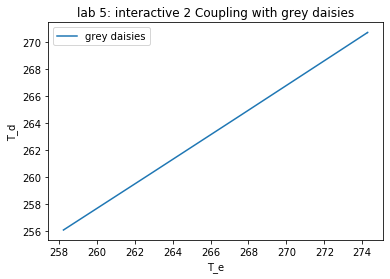

In [3]:
import matplotlib.pyplot as plt

# PROBLEM COUPLING.Q2: FIND THE VALUE OF L WHICH LEADS TO NON-ZERO STEADY STATE:
newL = 0.5
limit = 0;
while abs(limit) < 1:
    theSolver = IntegCoupling("coupling.yaml")
    theSolver.reset_L(newL) 
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    print('L = ',newL,'| steady state value = ',yVals[-1])
    limit   = yVals[-1]
    newL    = newL + 0.01
    if newL > 1.0:
        break
        
# PROBLEM COUPLING.Q3: PLOT L vs. T_E FOR 10-15 VALUES OF L:
T_em     = np.zeros((11,1))
Lvals   = np.linspace(0, 1.0, 11)
i       = 0
for newL in Lvals:
    theSolver = IntegCoupling("coupling.yaml")
    theSolver.reset_L(newL)
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    T_em[i] = theSolver.T_em( yVals[-1] )
    print (T_em[i])
    i = i+1
    
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(Lvals, T_em)
theAx.set_title('lab 5: interactive 2 Coupling with grey daisies')
theAx.set_xlabel('L')
theAx.set_ylabel('T_em')
out = theAx.legend(theLines, ('grey daisies', ), loc='best')

# PROBLEM COUPLING.Q4: DIFFERENCE BETWEEN THE DAISY TEMPERATURE AND EMISSION
# TEMPERATURE
newL = 0.5
theSolver = IntegCoupling("coupling.yaml")
timeVals, yVals, errorList = theSolver.timeloop5fixed()
#Calculate the difference between T_d and T_e
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(theSolver.T_e, theSolver.T_d)
theAx.set_title('lab 5: interactive 2 Coupling with grey daisies')
theAx.set_xlabel('T_e')
theAx.set_ylabel('T_d')
out = theAx.legend(theLines, ('grey daisies', ), loc='best')
difference = np.asarray(theSolver.T_d) - np.asarray(theSolver.T_e)
print ( 'no. of elements in difference = ' , len(difference) )
print ( '\n no. with T_e > T_d = ' , np.sum( np.array(difference < 0 ) ))

**Problem Conduction:** 

The conduction parameter R will determine the
temperature differential between the bare ground and the regions with
black or white daisies.  The code in the next cell specifies the derivatives
for this situation, removing the feedback between the daisies and the
planetary albedo but introducint conduction. Use it to investigate these two questions:

1.  Change the value of R and observe the effects on the daisy and
    emission temperature.
> <font color  = 'green'>
      For $L = 0.2$, the code can be run by setting a breakpoint right after the 'temp_y' line. Doing so gives the local temperature $T_i = 203.67 K$. This temperature is below the desired temperature range for the daisies (between 5 C and 40 C). So, the growth rate is 0, but the death rate is still there. So, the area covered by daisies will go down until it reaches 0. 
  </font>
 

2.  What are the effects on the daisy growth rate and the final steady
    states?
> <font color  = 'green'>
      For higher valeues of $R$, the steady state is zero for both the white and the black daisies. The critical point is roughly around $R=0.46$. $R$ values below 0.46 show steady states greater than 0 for the white daisies. The black daisies steady state is 0, except when $R=0$, i.e., during perfect conduction. 
      The daisy growth rate is maximum and positive (given by slope of the curve) for $R = 0$. For other values of $R$, the black daisies have negative growth rate. For the white daisies, the growth rate is negative for $R>0.43$

  </font>
    
    


In [4]:
#
# 5.2  keep the albedo constant at alpha_p and vary the conductivity R
#
from numlabs.lab5.lab5_funs import Integrator

class Integ53(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        # LINE ADDED FOR THE RESET_R FUNCTION TO BE USED:
        self.reset_R(newR)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0] - y[1]
        #
        # hard wire the albedo to that of the ground -- no daisy feedback
        #
        albedo_p = user.albedo_ground
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f
    
    # DEFINE RESET_R FUNCTION TO CHANGE THE VALUE OF R:
    def reset_R(self, newR):
        self.config["uservars"]["R"] = newR # change solar incidence fraction

size of timeSteps fixed =  500


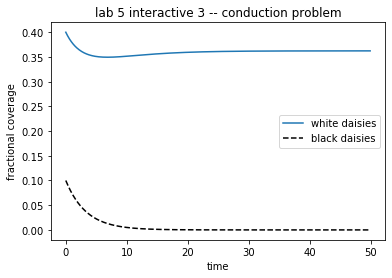

In [5]:
newR = 0.43
theSolver = Integ53('conduction.yaml')
theSolver.reset_R(newR) 
timeVals, yVals, errorList = theSolver.timeloop5fixed()

# plt.close('all')
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theAx.set_title('lab 5 interactive 3 -- conduction problem')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(theLines, ('white daisies', 'black daisies'), loc='center right')

**Problem initial:** 

The feedback means a stable daisy population (a
steady state) and the environmental conditions are in a delicate
balance. The code below produces a steady state which arises from a given initial daisy
population,

1.  Add a small initial fraction of black daisies (say, 0.01) to the
    value in initial.yaml and see
    what effect this has on the temperature and final daisy populations.
    Do you still have a final non-zero daisy population?
> <font color  = 'green'> Increasing the fraction of black daisies by 0.01 does not make difference to the final steady-state population for both the black and the white daisies. There is a minor increase in the temperature for both the white and the black daisies. 
  </font>
        
2.  Attempt to adjust the initial white daisy population to obtain a
    non-zero steady state. Do you have to increase or decrease the
    initial fraction? What is your explanation for this behavior?
> <font color  = 'green'> The initial white daisy population should be at least 0.2 to obtain non-zero steady state. To reach non-zero steady state the growth rate has to be positive for the white daisies. Growth rate depends on the daisy temperature, which depends on the emission temperature and the difference between the planetary albedo and the white daisy albedo. As the white daisy concentration is increased, the planetary albedo also increases. So, the difference between the planetary albedo and the white daisy albedo increaes. This causes increase in $T_i$ leading to increase in steady state concentration. 
  </font>

3.  Experiment with other initial fractions of daisies and look for
    non-zero steady states.
> <font color  = 'green'> 
    In general, the white concentration should be much greater than the black daisies for non-zero steady states. One instance is when, $A_w = 0.8$ and $A_b = 0.07$.
  </font>
    


**Problem Temperature**:  

The code above adds a new method, ```find_temp``` that takes the white/black daisy fractions and calculates local and planetary temperatures.

1. override ```timeloop5fixed``` so that it saves these three temperatures, plus the daisy growth rates
   to new variables in the Integ54 instance

2. Make plots of (temp_w, temp_b) and (beta_w, beta_b) vs. time for a case with non-zero equilibrium
   concentrations of both black and white daisies
> <font color  = 'green'> 
    See the following 2 cells for the code. An additional member (function) called ```timeloop5fixed``` is created in the ```Integ54``` class, which overrides the definintions of the same function in the ```Integrator``` class. This stores the required values in respective arrays, which is then used for plotting. 
  </font>


In [6]:
import pandas as pd

class Integ54(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()
        self.T_earth    = []
        self.T_black    = []
        self.T_white    = []
        self.beta_black = []
        self.beta_white = []

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)
        #print('t = ', t)
        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        self.beta_black_val = beta_b
        self.beta_white_val = beta_w
        
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f
    
    def timeloop5fixed(self):
        """fixed time step with
           estimated errors
        """
        t = self.timevars
        yold = self.yinit
        yError = np.zeros_like(yold)
        yvals = [yold]
        errorList = [yError]
        # np.arange is similar to lnspace
        timeSteps = np.arange(t.tstart, t.tend, t.dt)
        for theTime in timeSteps[:-1]:
            yold, yError, newTime = self.rkckODE5(yold, theTime, t.dt)
            # KADEL'S ADDITIONS:
            temp_w, temp_b, temp_e = self.find_temp(yold)
            self.T_earth.append(temp_e)
            self.T_black.append(temp_b)
            self.T_white.append(temp_w)
            self.beta_black.append(self.beta_black_val)
            self.beta_white.append(self.beta_white_val)
            ## END KADEL'S ADDITIONS
            #pdb.set_trace()
            yvals.append(yold)
            errorList.append(yError)
        yvals = np.array(yvals).squeeze()
        errorVals = np.array(errorList).squeeze()
        return (timeSteps, yvals, errorVals)

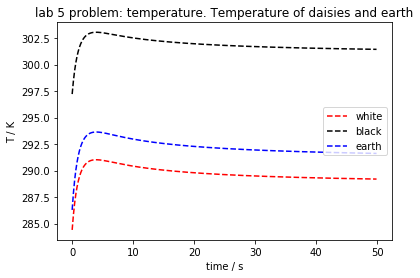

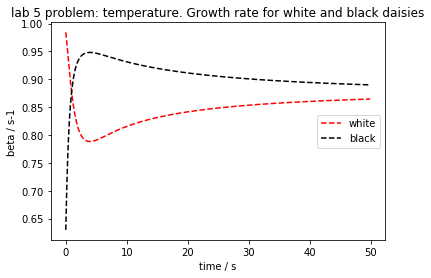

In [7]:
theSolver = Integ54('initial.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
# PLOT DAISY TEMPERATURES AND EMISSION TEMPERATURE OF THE EARTH 
plt.figure(1)
line1, = plt.plot(timevals[:-1], theSolver.T_white)
line2, = plt.plot(timevals[:-1], theSolver.T_black)
line3, = plt.plot(timevals[:-1], theSolver.T_earth)
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
line3.set(linestyle='--', color='b', label='earth')
plt.title('lab 5 problem: temperature. Temperature of daisies and earth')
plt.xlabel('time / s')
plt.ylabel('T / K')
out = plt.legend(loc='center right')
# PLOT BLACK AND WHITE DAISY GROWTH RATES:
plt.figure(2)
line1, = plt.plot(timevals[:-1], theSolver.beta_black)
line2, = plt.plot(timevals[:-1], theSolver.beta_white)
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
plt.title('lab 5 problem: temperature. Growth rate for white and black daisies') 
plt.xlabel('time / s')
plt.ylabel('beta / s-1')
out = plt.legend(loc='center right')

**Problem Estimate**: In the demo below, compare the error estimate to
the true error, on the initial value problem from ,

$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1$$

which has the exact
solution

$$y(t) = t + e^{-t}$$

1.  Play with the time step and final time, attempting small changes at
    first. How reasonable is the error estimate?
> <font color  = 'green'> 
    The error estimate is still lower than the actual error. Reducing time step did not make much difference. Increasing the final time causes increase in the error over time. 
  </font>

2.  Keep decreasing the time step. Does the error estimate diverge from
    the computed error? Why?
> <font color  = 'green'> 
    Yes, the error estimate diverges for very small time steps below 0.04. 
  </font>


3.  Keep increasing the time step. Does the error estimate diverge? What
    is happening with the numerical solution?
> <font color  = 'green'> 
   The error estimate does not diverge for adaptive time step, but it does for fixed time step. The numerical solution is unstable for fixed time step, whereas it remains stable for the adaptive time step runge kutta. 
  </font>
    

In [8]:
from numlabs.lab5.lab5_funs import Integrator


class Integ55(Integrator):
    def set_yinit(self):
        #
        # read in 'c1 c2 c3'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in initial yinit
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.yinit])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def derivs5(self, y, theTime):
        """
           y[0]=fraction white daisies
        """
        user = self.uservars
        f = np.empty_like(self.yinit)
        f[0] = user.c1 * y[0] + user.c2 * theTime + user.c3
        return f

timesteps for adaptive =  50.0
timesteps for adaptive =  6.50869887983457
timesteps for adaptive =  0.7396232168230061
timesteps for adaptive =  0.36981160841150307
timesteps for adaptive =  0.9009187732247524
timesteps for adaptive =  1.4320259380380018
timesteps for adaptive =  2.0898408198364944
timesteps for adaptive =  2.8390295475996803
timesteps for adaptive =  3.7192509163313865
timesteps for adaptive =  4.769828053592992
timesteps for adaptive =  6.053877160301516
timesteps for adaptive =  7.672171271004126
timesteps for adaptive =  9.800079082591376
timesteps for adaptive =  12.76997763710617
timesteps for adaptive =  17.212123357946346
timesteps for adaptive =  23.06466454878533
timesteps for adaptive =  20.13839395336584
timesteps for adaptive =  25.207197666968703
timesteps for adaptive =  31.745595142767698
timesteps for adaptive =  28.4763964048682
timesteps for adaptive =  33.20667001433067
timesteps for adaptive =  38.67968355778322
timesteps for adaptive =  35.9431767

size of timeSteps fixed =  10


Text(0.5, 1.0, 'lab 5 interactive 5 -- fixed errors')

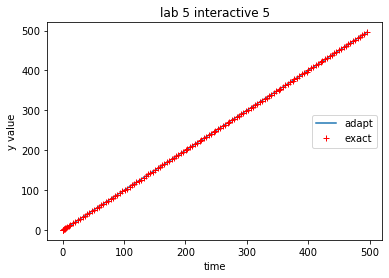

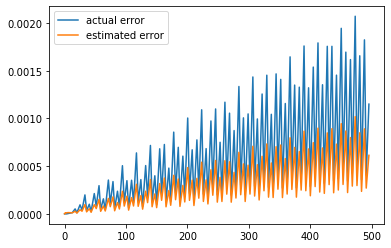

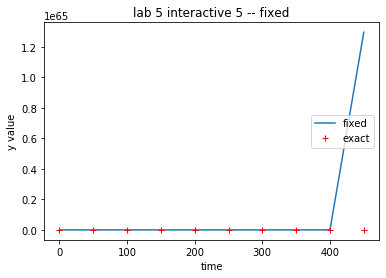

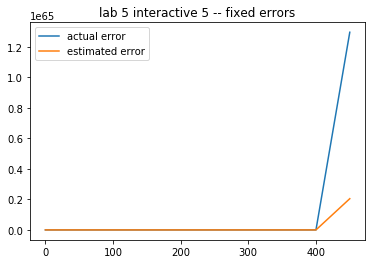

In [9]:
import matplotlib.pyplot as plt

theSolver = Integ55('expon.yaml')

timeVals, yVals, yErrors = theSolver.timeloop5Err()
timeVals = np.array(timeVals)
exact = timeVals + np.exp(-timeVals)
yVals = np.array(yVals)
yVals = yVals.squeeze()
yErrors = np.array(yErrors)

thefig, theAx = plt.subplots(1, 1)
line1 = theAx.plot(timeVals, yVals, label='adapt')
line2 = theAx.plot(timeVals, exact, 'r+', label='exact')
theAx.set_title('lab 5 interactive 5')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

#
# we need to unpack yvals (a list of arrays of length 1
# into an array of numbers using a list comprehension
#

thefig, theAx = plt.subplots(1, 1)
realestError = yVals - exact
actualErrorLine = theAx.plot(timeVals, realestError, label='actual error')
estimatedErrorLine = theAx.plot(timeVals, yErrors, label='estimated error')
theAx.legend(loc='best')

timeVals, yVals, yErrors = theSolver.timeloop5fixed()

np_yVals = np.array(yVals).squeeze()
yErrors = np.array(yErrors)
np_exact = timeVals + np.exp(-timeVals)

thefig, theAx = plt.subplots(1, 1)
line1 = theAx.plot(timeVals, np_yVals, label='fixed')
line2 = theAx.plot(timeVals, np_exact, 'r+', label='exact')
theAx.set_title('lab 5 interactive 5 -- fixed')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

thefig, theAx = plt.subplots(1, 1)
realestError = np_yVals - np_exact
actualErrorLine = theAx.plot(timeVals, realestError, label='actual error')
estimatedErrorLine = theAx.plot(timeVals, yErrors, label='estimated error')
theAx.legend(loc='best')
theAx.set_title('lab 5 interactive 5 -- fixed errors')

**Problem adaptive** The demos in the previous section, solved the
Daisyworld equations using the embedded Runge-Kutta methods with
adaptive timestep control.

1.  Run the code and find solutions of Daisyworld with the default
    settings found in adapt.yaml using the timeloop5Err adaptive
    code
> <font color  = 'green'> 
   Run the cells below. The steady state concentration for white daisies comes out to be around 0.50, while for the black daisies comes out to be roughly 0.17 for the given settings.
</font>

2.  Find the solutions again but this time with fixed stepsizes and
    compare the size of the timesteps and number of the timesteps.
> <font color  = 'green'> 
   The length of the ```timeVals``` array represents the number of timesteps involved in the fixed Runge-Kutta, but it is not the case for the adaptive. In adaptive, the algorithm might find that certain timesteps are bad, i.e. the expected error due to the timestep is more than the tolerated value. So, print steps can be put in the ```timeloop5Err``` function within ```Integrator``` class. It shows that there are actually 31 timesteps that were used by the algorithm. Out of the 31, only 23 were used for the adaptive stepsize, whereas the fixed stepsize had 500 timesteps. 
</font>

> <font color  = 'green'> 
   The fixed stepsize had constant $dt = 0.1$. For the adaptive Runge-Kutta, the stepsize ranged from the default $0.1$ up to $6.14$.
</font>

3.  How much faster does the fixed timeloop need to be to give the
    same performance as the adaptive timeloop for this case?
> <font color  = 'green'> 
   The function run of both these methods can be timed (see code below:). By dividing the time for fixed timestep by the adaptive timestep, it turns out that the fixed timeloop would need to be at least 14 times faster. 
</font>

In [10]:
from numlabs.lab5.lab5_funs import Integrator

class Integ54(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f

timesteps for adaptive =  0.1
timesteps for adaptive =  0.6
timesteps for adaptive =  2.571743465762584
timesteps for adaptive =  1.5858717328812921
timesteps for adaptive =  3.5437476740163243
timesteps for adaptive =  2.564809703448808
timesteps for adaptive =  3.543747674016324
timesteps for adaptive =  5.707660228317575
timesteps for adaptive =  4.625703951166949
timesteps for adaptive =  6.6250051464942805
timesteps for adaptive =  5.625354548830615
timesteps for adaptive =  5.125529249998782
timesteps for adaptive =  7.083626834815962
timesteps for adaptive =  6.104578042407372
timesteps for adaptive =  7.083626834815962
timesteps for adaptive =  8.802123139175272
timesteps for adaptive =  10.520619443534581
timesteps for adaptive =  9.661371291354927
timesteps for adaptive =  11.11521164222107
timesteps for adaptive =  12.569051993087212
timesteps for adaptive =  14.022892343953355
timesteps for adaptive =  15.672582886485506
timesteps for adaptive =  17.662085511703445
timestep

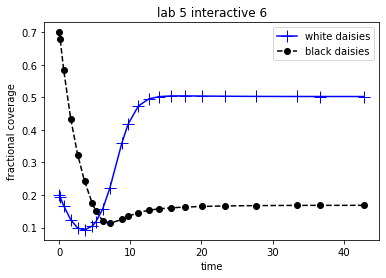

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

theSolver = Integ54('adapt.yaml')
# timing the run for adaptive Runge-Kutta:
startTime = datetime.now()
timeVals, yVals, errorList = theSolver.timeloop5Err()
print('Adaptive RK takes = ', datetime.now() - startTime , ' s')
# -- end of timing part --
yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black'])
print('Final white concentration = ', yvals.iat[-1,0])
print('Final black concentration = ', yvals.iat[-1,1])
# plot the results for part 1:
thefig, theAx = plt.subplots(1, 1)
points, = theAx.plot(timeVals, yvals['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--ko', label='black daisies')
theAx.set_title('lab 5 interactive 6')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')
# Part 2: compare with fixed timestep:
diff = []
for i in range(len(timeVals)):
    diff.append( timeVals[i+1] - timeVals[i] )
    if i == len(timeVals) - 2:
        break
print('adaptive smallest dt = ', min(diff))
print('adaptive largest dt = ', max(diff))
print('Adaptive RK no. of timesteps = ', len(timeVals))
# timing the run for fixed timestep Runge-Kutta:
startTime = datetime.now()
timeVals,yVals,errorList = theSolver.timeloop5fixed()
print('Fixed RK takes = ', datetime.now() - startTime , ' s')
print('Fixed RK no. of timesteps = ', len(timeVals))


**Problem Predator**: 

To make life a little more interesting on
Daisyworld, add a population of rabbits that feed upon the daisies. The
rabbit birth rate will be proportional to the area covered by the
daisies while, conversely, the daisy *death rate* will be
proportional to the rabbit population.

Add another equation to the Daisyworld model which governs the rabbit
population and make the appropriate modifications to the existing daisy
equations. Modify the set of equations and solve it with the Runge-Kutta
method with adaptive timesteps. Use it to look for steady states and to
determine their dependence on the initial conditions and model
parameters.

Hand in notebook cells that:

1.  Show your modified Daisyworld equations and your new integrator class.

2.  At least one set of parameter values and initial conditions that
    leads to the steady state and a plot of the timeseries for the daisies and rabbits.

3.  A discussion of the steady state’s dependence on these values, i.e.
    what happens when they are altered. Include a few plots for
    illustration.

4.  Does adding this feedback extend the range of habital L values  for which
    non-zero populations exist?

**Bonus:**: Now consider foxes that prey on rabbits but
leave the daisies alone.